In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotnine import *

superstore_db = pd.read_csv("Sample - Superstore.csv")
superstore_db.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
superstore_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Create an interactive line chart to show sales trends over the years.


In [10]:
superstore_db['Order Date'] = pd.to_datetime(superstore_db['Order Date'])
superstore_db['Year'] = superstore_db['Order Date'].dt.year
superstore_db.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [14]:
sales_by_year = superstore_db.groupby('Year')['Sales'].sum().reset_index()

fig =px.line(sales_by_year, x='Year', y='Sales', title='Sales Over Time')
fig.show()

In [31]:
sales_by_country = superstore_db.groupby('Country')['Sales'].sum().reset_index()

fig_map = px.choropleth(sales_by_country, 
                        locations='Country', 
                        locationmode='country names', 
                        color='Sales', 
                        hover_name='Country', 
                        title='Sales Distribution by Country')

fig_map.show()

Use Plotnine to generate a bar chart showing top 10 products by sales.


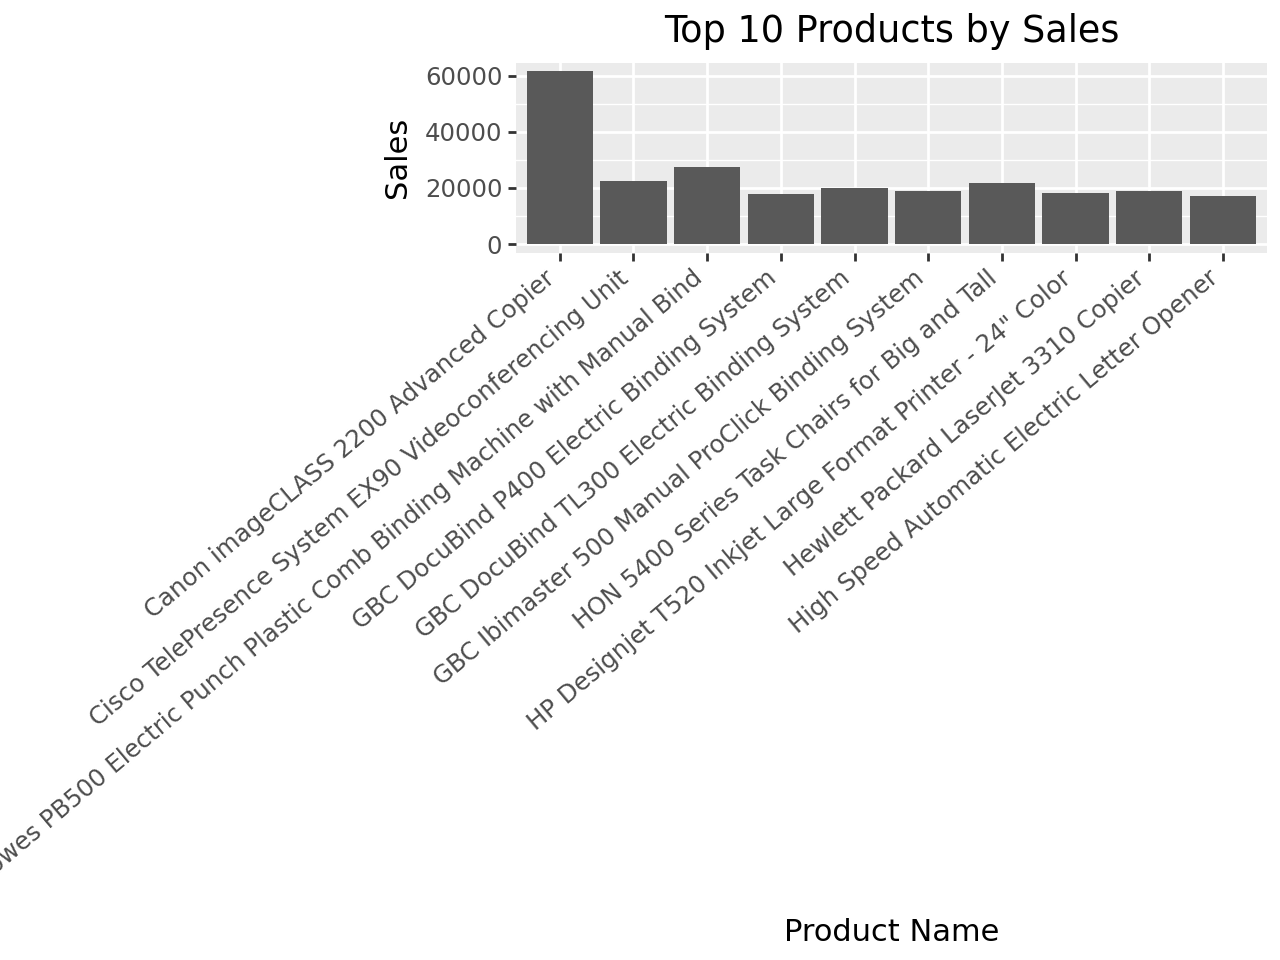

In [32]:
import pandas as pd

top_10_products = superstore_db.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()


top_10_products['Product Name'] = top_10_products['Product Name'].astype('category')
top_10_products['Product Name'] = top_10_products['Product Name'].cat.reorder_categories(
    top_10_products.sort_values('Sales', ascending=False)['Product Name'],
    ordered=True
)

top_10_chart = (
    ggplot(top_10_products, aes(x='Product Name', y='Sales')) +
    geom_bar(stat='identity') +
        labs(title='Top 10 Products by Sales', x='Product Name', y='Sales') +
        theme(axis_text_x=element_text(rotation=40, hjust=1))
)

top_10_chart


Create a scatter plot to analyze the relationship between profit and discount.


In [33]:
fig_scatter = px.scatter(superstore_db, x='Discount', y='Profit', title='Profit vs Discount')
fig_scatter.show()

### Comparison of Insights from Plotly and Plotnine Visualizations

#### Plotly Visualizations:
1. **Sales Over Time (Line Chart)**:
    - **Insight**: Upward sales trend from 2014 to 2017.

2. **Sales Distribution by Country (Choropleth Map)**:
    - **Insight**: US has the highest sales.

3. **Profit vs Discount (Scatter Plot)**:
    - **Insight**: Higher discounts lead to mainly to loss money

#### Plotnine Visualizations:
1. **Top 10 Products by Sales (Bar Chart)**:
    - **Insight**: "Canon imageCLASS 2200 Advanced Copier" is the top-selling product.

Both tools complement each other: Plotly for interactive exploration, Plotnine for static presentation.
